In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/uniwork

/content/drive/MyDrive/uniwork


In [4]:
df = pd.read_csv('Crime_Data_from_2020_to_Present.csv')

df.head(5)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


In [5]:
df.drop(df.columns[[0, 7, 16, 17, 18, 19, 24, 25]], axis = 1, inplace = True)

In [6]:
df['DATE OCC'] = df['DATE OCC'].str.extract(r'(\d{2}/\d{2}/\d{4})')
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'], format='%m/%d/%Y')
df['Day'] = df['DATE OCC'].dt.day_name()
df['Month'] = df['DATE OCC'].dt.month_name()
df['Year'] = df['DATE OCC'].dt.year

from datetime import time


def convert_to_time(value):
    hours = value // 100
    minutes = value % 100
    return time(hours, minutes)


df['TIME OCC'] = df['TIME OCC'].apply(convert_to_time)

df['TIME OCC'] = df['TIME OCC'].astype(str).str.zfill(4)

df.drop(df.columns[[0, 1]], axis = 1, inplace = True)
df = df[['Day',
       'Month', 'Year', 'TIME OCC', 'AREA', 'AREA NAME', 'Rpt Dist No', 'Crm Cd', 'Crm Cd Desc',
       'Mocodes', 'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd',
       'Premis Desc', 'Crm Cd 1', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LAT', 'LON']]
df = df[df['Year'] > 2022]

In [7]:
values1 = {'Crm Cd 2': 0, 'Crm Cd 3': 0, 'Crm Cd 4': 0}
clean_df = df.fillna(value = values1)
clean_df.head(10)

clean_df.dropna(subset = ['Crm Cd 1', 'Mocodes'], inplace = True)
clean_df

values2 = {'Vict Sex': 'X', 'Vict Descent': 'X'}
clean_df2 = clean_df.fillna(value = values2)
clean_df2.replace(['H'], 'X', inplace = True)
clean_df2

clean_df2.dropna(subset = ['Premis Cd', 'Premis Desc'], inplace = True)
clean_df2

,Day,Month,Year,TIME OCC,AREA,AREA NAME,Rpt Dist No,Crm Cd,Crm Cd Desc,Mocodes,...,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON
337691,Thursday,June,2023,10:50:00,15,N Hollywood,1549,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),0344,...,M,O,202.0,LIQUOR STORE,442.0,0.0,0.0,0.0,34.1722,-118.3750
408864,Saturday,June,2023,21:50:00,20,Olympic,2022,946,OTHER MISCELLANEOUS CRIME,1202 2004 1300,...,X,X,101.0,STREET,946.0,0.0,0.0,0.0,34.0671,-118.3128
409228,Tuesday,April,2023,07:30:00,7,Wilshire,763,310,BURGLARY,0344 0329,...,F,B,120.0,STORAGE SHED,310.0,0.0,0.0,0.0,34.0472,-118.3656
409479,Saturday,April,2023,12:02:00,10,West Valley,1063,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),0344,...,X,X,402.0,MARKET,442.0,0.0,0.0,0.0,34.1707,-118.5407
409758,Friday,August,2023,14:25:00,21,Topanga,2185,624,BATTERY - SIMPLE ASSAULT,1202 0417 0361 0603,...,M,W,501.0,SINGLE FAMILY DWELLING,624.0,0.0,0.0,0.0,34.1523,-118.6108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
788762,Thursday,January,2023,18:00:00,16,Foothill,1663,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",1300 0329,...,M,X,122.0,"VEHICLE, PASSENGER/TRUCK",740.0,0.0,0.0,0.0,34.2466,-118.4054
788763,Wednesday,March,2023,10:00:00,16,Foothill,1602,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",0416 0411 1822,...,F,X,102.0,SIDEWALK,230.0,0.0,0.0,0.0,34.2790,-118.4116
788764,Wednesday,April,2023,16:30:00,12,77th Street,1239,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",0601 0445 0416 0359,...,M,B,222.0,LAUNDROMAT,230.0,0.0,0.0,0.0,33.9841,-118.2915
788765,Saturday,July,2023,00:01:00,1,Central,154,352,PICKPOCKET,1822 0344,...,F,X,735.0,NIGHT CLUB (OPEN EVENINGS ONLY),352.0,0.0,0.0,0.0,34.0467,-118.2485


In [8]:
clean_df2['AREA NAME'].value_counts()

Central        9684
77th Street    7514
Pacific        7248
Southwest      6926
Hollywood      6621
Olympic        6558
Wilshire       6457
Southeast      6267
Newton         6233
West LA        5975
N Hollywood    5955
Rampart        5937
Van Nuys       5576
West Valley    5431
Northeast      5361
Devonshire     5310
Topanga        5300
Harbor         4675
Mission        4483
Hollenbeck     4268
Foothill       3817
Name: AREA NAME, dtype: int64

In [9]:
clean_df2_shuffled = clean_df2.sample(n=len(clean_df2), random_state=1)
clean_df2_shuffled

,Day,Month,Year,TIME OCC,AREA,AREA NAME,Rpt Dist No,Crm Cd,Crm Cd Desc,Mocodes,...,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON
672888,Wednesday,April,2023,09:45:00,12,77th Street,1245,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",0416 1822 1402 1300 0329 1307 2024,...,M,X,101.0,STREET,230.0,0.0,0.0,0.0,33.9762,-118.3024
767207,Tuesday,January,2023,17:00:00,7,Wilshire,724,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),0325 2024,...,X,X,415.0,THE GROVE,442.0,0.0,0.0,0.0,34.0736,-118.3563
773072,Friday,February,2023,21:15:00,2,Rampart,205,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,0344 0329 0385,...,F,B,501.0,SINGLE FAMILY DWELLING,331.0,0.0,0.0,0.0,34.0786,-118.2708
706311,Monday,May,2023,09:00:00,13,Newton,1321,310,BURGLARY,0344,...,M,A,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",310.0,0.0,0.0,0.0,34.0289,-118.2686
653634,Wednesday,July,2023,23:50:00,2,Rampart,211,330,BURGLARY FROM VEHICLE,1822 0344 0352 1300 1601,...,F,X,506.0,ABANDONED BUILDING ABANDONED HOUSE,330.0,0.0,0.0,0.0,34.0790,-118.2981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701176,Wednesday,August,2023,10:00:00,18,Southeast,1803,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,1202 1822 0385,...,M,X,101.0,STREET,331.0,0.0,0.0,0.0,33.9591,-118.2695
756852,Friday,June,2023,10:20:00,11,Northeast,1118,626,INTIMATE PARTNER - SIMPLE ASSAULT,2000 0913 1814 2004 1218 0356 0443,...,F,X,108.0,PARKING LOT,626.0,0.0,0.0,0.0,34.1099,-118.1931
648869,Monday,April,2023,12:00:00,6,Hollywood,646,440,THEFT PLAIN - PETTY ($950 & UNDER),1822 0344,...,F,W,203.0,OTHER BUSINESS,440.0,0.0,0.0,0.0,34.1016,-118.3361
733329,Tuesday,May,2023,14:30:00,4,Hollenbeck,407,320,"BURGLARY, ATTEMPTED",1402 1602,...,X,X,725.0,"GOVERNMENT FACILITY (FEDERAL,STATE, COUNTY & C...",320.0,998.0,0.0,0.0,34.0881,-118.1877


In [10]:
pd.get_dummies(clean_df2_shuffled['AREA NAME']).head()

,77th Street,Central,Devonshire,Foothill,Harbor,Hollenbeck,Hollywood,Mission,N Hollywood,Newton,...,Olympic,Pacific,Rampart,Southeast,Southwest,Topanga,Van Nuys,West LA,West Valley,Wilshire
672888,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
767207,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
773072,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
706311,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
653634,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [11]:
clean_df2_shuffled.drop('AREA NAME', axis = 1).head()

,Day,Month,Year,TIME OCC,AREA,Rpt Dist No,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON
672888,Wednesday,April,2023,09:45:00,12,1245,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",0416 1822 1402 1300 0329 1307 2024,39,M,X,101.0,STREET,230.0,0.0,0.0,0.0,33.9762,-118.3024
767207,Tuesday,January,2023,17:00:00,7,724,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),0325 2024,22,X,X,415.0,THE GROVE,442.0,0.0,0.0,0.0,34.0736,-118.3563
773072,Friday,February,2023,21:15:00,2,205,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,0344 0329 0385,37,F,B,501.0,SINGLE FAMILY DWELLING,331.0,0.0,0.0,0.0,34.0786,-118.2708
706311,Monday,May,2023,09:00:00,13,1321,310,BURGLARY,0344,23,M,A,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",310.0,0.0,0.0,0.0,34.0289,-118.2686
653634,Wednesday,July,2023,23:50:00,2,211,330,BURGLARY FROM VEHICLE,1822 0344 0352 1300 1601,58,F,X,506.0,ABANDONED BUILDING ABANDONED HOUSE,330.0,0.0,0.0,0.0,34.0790,-118.2981


In [12]:
clean_df2_final = pd.concat([clean_df2_shuffled.drop('AREA NAME', axis = 1), pd.get_dummies(clean_df2_shuffled['AREA NAME'])], axis = 1)
clean_df2_final

,Day,Month,Year,TIME OCC,AREA,Rpt Dist No,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,...,Olympic,Pacific,Rampart,Southeast,Southwest,Topanga,Van Nuys,West LA,West Valley,Wilshire
672888,Wednesday,April,2023,09:45:00,12,1245,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",0416 1822 1402 1300 0329 1307 2024,39,...,0,0,0,0,0,0,0,0,0,0
767207,Tuesday,January,2023,17:00:00,7,724,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),0325 2024,22,...,0,0,0,0,0,0,0,0,0,1
773072,Friday,February,2023,21:15:00,2,205,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,0344 0329 0385,37,...,0,0,1,0,0,0,0,0,0,0
706311,Monday,May,2023,09:00:00,13,1321,310,BURGLARY,0344,23,...,0,0,0,0,0,0,0,0,0,0
653634,Wednesday,July,2023,23:50:00,2,211,330,BURGLARY FROM VEHICLE,1822 0344 0352 1300 1601,58,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701176,Wednesday,August,2023,10:00:00,18,1803,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,1202 1822 0385,72,...,0,0,0,1,0,0,0,0,0,0
756852,Friday,June,2023,10:20:00,11,1118,626,INTIMATE PARTNER - SIMPLE ASSAULT,2000 0913 1814 2004 1218 0356 0443,54,...,0,0,0,0,0,0,0,0,0,0
648869,Monday,April,2023,12:00:00,6,646,440,THEFT PLAIN - PETTY ($950 & UNDER),1822 0344,29,...,0,0,0,0,0,0,0,0,0,0
733329,Tuesday,May,2023,14:30:00,4,407,320,"BURGLARY, ATTEMPTED",1402 1602,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
clean_df2_final = clean_df2_final[['Day',	'Month',	'Year',	'TIME OCC',	'AREA',	'Rpt Dist No',	'Crm Cd',	'Crm Cd Desc',	'Mocodes',
                                   'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc', 'Crm Cd 1', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4',
                                   'LAT', 'LON', 'Southwest', 'Central', 'N Hollywood', 'Mission', 'Devonshire', 'Northeast', 'Harbor', 'Van Nuys', 'West Valley', 'West LA', 'Wilshire', 'Pacific', 'Rampart', '77th Street', 'Hollenbeck', 'Southeast', 'Hollywood', 'Newton', 'Topanga', 'Foothill', 'Olympic', 'Vict Age']]

clean_df2_final

,Day,Month,Year,TIME OCC,AREA,Rpt Dist No,Crm Cd,Crm Cd Desc,Mocodes,Vict Sex,...,Rampart,77th Street,Hollenbeck,Southeast,Hollywood,Newton,Topanga,Foothill,Olympic,Vict Age
672888,Wednesday,April,2023,09:45:00,12,1245,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",0416 1822 1402 1300 0329 1307 2024,M,...,0,1,0,0,0,0,0,0,0,39
767207,Tuesday,January,2023,17:00:00,7,724,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),0325 2024,X,...,0,0,0,0,0,0,0,0,0,22
773072,Friday,February,2023,21:15:00,2,205,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,0344 0329 0385,F,...,1,0,0,0,0,0,0,0,0,37
706311,Monday,May,2023,09:00:00,13,1321,310,BURGLARY,0344,M,...,0,0,0,0,0,1,0,0,0,23
653634,Wednesday,July,2023,23:50:00,2,211,330,BURGLARY FROM VEHICLE,1822 0344 0352 1300 1601,F,...,1,0,0,0,0,0,0,0,0,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701176,Wednesday,August,2023,10:00:00,18,1803,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,1202 1822 0385,M,...,0,0,0,1,0,0,0,0,0,72
756852,Friday,June,2023,10:20:00,11,1118,626,INTIMATE PARTNER - SIMPLE ASSAULT,2000 0913 1814 2004 1218 0356 0443,F,...,0,0,0,0,0,0,0,0,0,54
648869,Monday,April,2023,12:00:00,6,646,440,THEFT PLAIN - PETTY ($950 & UNDER),1822 0344,F,...,0,0,0,0,1,0,0,0,0,29
733329,Tuesday,May,2023,14:30:00,4,407,320,"BURGLARY, ATTEMPTED",1402 1602,X,...,0,0,1,0,0,0,0,0,0,0


Dropping all Non Numeric Columns

In [14]:
clean_df2_final.drop(clean_df2_final.columns[[0, 1, 2, 3, 7, 9, 10, 12, 17, 18]], axis = 1, inplace = True)

<ipython-input-14-b1b2b6ef2cb5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df2_final.drop(clean_df2_final.columns[[0, 1, 2, 3, 7, 9, 10, 12, 17, 18]], axis = 1, inplace = True)


In [15]:
clean_df2_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125596 entries, 672888 to 757407
Data columns (total 31 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   AREA         125596 non-null  int64  
 1   Rpt Dist No  125596 non-null  int64  
 2   Crm Cd       125596 non-null  int64  
 3   Mocodes      125596 non-null  object 
 4   Premis Cd    125596 non-null  float64
 5   Crm Cd 1     125596 non-null  float64
 6   Crm Cd 2     125596 non-null  float64
 7   Crm Cd 3     125596 non-null  float64
 8   Crm Cd 4     125596 non-null  float64
 9   Southwest    125596 non-null  uint8  
 10  Central      125596 non-null  uint8  
 11  N Hollywood  125596 non-null  uint8  
 12  Mission      125596 non-null  uint8  
 13  Devonshire   125596 non-null  uint8  
 14  Northeast    125596 non-null  uint8  
 15  Harbor       125596 non-null  uint8  
 16  Van Nuys     125596 non-null  uint8  
 17  West Valley  125596 non-null  uint8  
 18  West LA      125596

In [16]:
clean_df2_final.drop(clean_df2_final.columns[[3]], axis = 1, inplace = True)

<ipython-input-16-75cb8fc8cdb9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df2_final.drop(clean_df2_final.columns[[3]], axis = 1, inplace = True)


In [17]:
clean_df2_final = clean_df2_final.dropna()
len(clean_df2_final)

125596

In [18]:
train_pd, test_pd, val_pd = clean_df2_final[:100000], clean_df2_final[100000:112798], clean_df2_final[112798:]
len(train_pd), len(test_pd), len(val_pd)

(100000, 12798, 12798)

In [19]:
X_train, y_train = train_pd.to_numpy()[:, :-1], train_pd.to_numpy()[:, -1]
X_val, y_val = val_pd.to_numpy()[:, :-1], val_pd.to_numpy()[:, -1]
X_test, y_test = test_pd.to_numpy()[:, :-1], test_pd.to_numpy()[:, -1]

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((100000, 29), (100000,), (12798, 29), (12798,), (12798, 29), (12798,))

In [20]:
column_index = clean_df2_final.columns.get_loc('Southwest')
print(column_index)

8


In [21]:
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler().fit(X_train[:, :8])

def preprocessor(X):
  A = np.copy(X)
  A[:, :8] = scaler.transform(A[:, :8])
  return A

X_train, X_val, X_test = preprocessor(X_train), preprocessor(X_val), preprocessor(X_test)

In [22]:
X_train_preprocessed = preprocessor(X_train)
X_train_preprocessed

array([[-1.69305562, -1.80508726, -2.2659015 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.82558696, -1.80646849, -2.26151041, ...,  0.        ,
         0.        ,  0.        ],
       [-1.95811831, -1.80784442, -2.26380952, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.95811831, -1.80784707, -2.25227255, ...,  0.        ,
         0.        ,  0.        ],
       [-1.7990807 , -1.80604166, -2.26383023, ...,  0.        ,
         0.        ,  0.        ],
       [-1.82558696, -1.80647379, -2.26151041, ...,  0.        ,
         0.        ,  0.        ]])

In [23]:
pd.DataFrame(X_train_preprocessed)

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,-1.693056,-1.805087,-2.265902,-1.576404,-2.266992,-0.289948,-0.05034,-0.009951,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-1.825587,-1.806468,-2.261510,-1.569675,-2.262592,-0.289948,-0.05034,-0.009951,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.958118,-1.807844,-2.263810,-1.567831,-2.264896,-0.289948,-0.05034,-0.009951,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.666549,-1.804886,-2.264244,-1.567810,-2.265332,-0.289948,-0.05034,-0.009951,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-1.958118,-1.807829,-2.263830,-1.567724,-2.264917,-0.289948,-0.05034,-0.009951,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,-1.560524,-1.803711,-2.254903,-1.574068,-2.255971,-0.289948,-0.05034,-0.009951,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99996,-1.799081,-1.806126,-2.263810,-1.563416,-2.264896,-0.289948,-0.05034,-0.009951,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99997,-1.958118,-1.807847,-2.252273,-1.567831,-2.253335,-0.289948,-0.05034,-0.009951,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99998,-1.799081,-1.806042,-2.263830,-1.576404,-2.264917,-0.289948,-0.05034,-0.009951,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Histogram of each column.

array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>,
        <Axes: title={'center': '2'}>, <Axes: title={'center': '3'}>,
        <Axes: title={'center': '4'}>],
       [<Axes: title={'center': '5'}>, <Axes: title={'center': '6'}>,
        <Axes: title={'center': '7'}>, <Axes: title={'center': '8'}>,
        <Axes: title={'center': '9'}>],
       [<Axes: title={'center': '10'}>, <Axes: title={'center': '11'}>,
        <Axes: title={'center': '12'}>, <Axes: title={'center': '13'}>,
        <Axes: title={'center': '14'}>],
       [<Axes: title={'center': '15'}>, <Axes: title={'center': '16'}>,
        <Axes: title={'center': '17'}>, <Axes: title={'center': '18'}>,
        <Axes: title={'center': '19'}>],
       [<Axes: title={'center': '20'}>, <Axes: title={'center': '21'}>,
        <Axes: title={'center': '22'}>, <Axes: title={'center': '23'}>,
        <Axes: title={'center': '24'}>],
       [<Axes: title={'center': '25'}>, <Axes: title={'center': '26'}>,
        <Axes

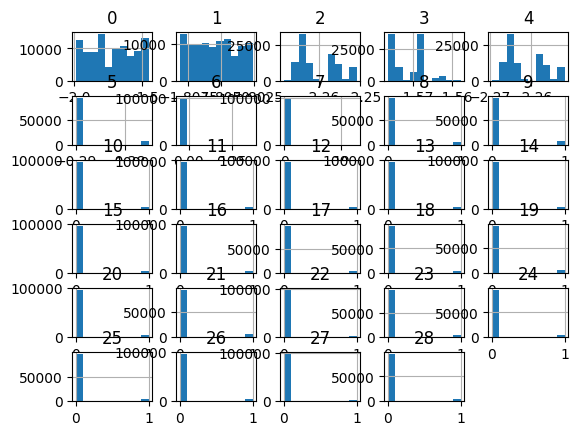

In [24]:
pd.DataFrame(X_train_preprocessed).hist()

In [25]:
X_train.shape, X_val.shape, X_test.shape

((100000, 29), (12798, 29), (12798, 29))

RMSE

In [26]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LinearRegression

lm = LinearRegression().fit(X_train, y_train)
mse(lm.predict(X_train), y_train, squared=False), mse(lm.predict(X_val), y_val, squared=False)

(20.224810406982435, 20.251087000108253)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=10).fit(X_train, y_train)
mse(knn.predict(X_train), y_train, squared=False), mse(knn.predict(X_val), y_val, squared=False)

(16.2408025786905, 18.031925530406195)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(max_depth=10).fit(X_train, y_train)
mse(rfr.predict(X_train), y_train, squared=False), mse(rfr.predict(X_val), y_val, squared=False)

(16.460285340290334, 16.90285128537542)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators=250).fit(X_train, y_train)
mse(gbr.predict(X_train), y_train, squared=False), mse(gbr.predict(X_val), y_val, squared=False)

(17.143041506389007, 17.255802771407566)

Trying Linear Regression

In [27]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LinearRegression

# Assuming you have X_train, y_train, X_val, and y_val

# Create and fit a linear regression model
lm = LinearRegression()
lm.fit(X_train, y_train)

# Predict on the training and validation sets
y_train_pred = lm.predict(X_train)
y_val_pred = lm.predict(X_val)

# Calculate the RMSE for the training and validation sets
rmse_train = mse(y_train_pred, y_train, squared=False)
rmse_val = mse(y_val_pred, y_val, squared=False)

print("RMSE on training set:", rmse_train)
print("RMSE on validation set:", rmse_val)

RMSE on training set: 20.224810406982435
RMSE on validation set: 20.251087000108253


Metric Evaluation

In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
from sklearn.linear_model import LinearRegression

# Assuming you have X_train, y_train, X_val, y_val, X_test, and y_test

# Create and fit a linear regression model
lm = LinearRegression()
lm.fit(X_train, y_train)

# Predict on the training, validation, and test sets
y_train_pred = lm.predict(X_train)
y_val_pred = lm.predict(X_val)
y_test_pred = lm.predict(X_test)

# Calculate evaluation metrics
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
rmse_val = mean_squared_error(y_val, y_val_pred, squared=False)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_val = mean_absolute_error(y_val, y_val_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

r2_train = r2_score(y_train, y_train_pred)
r2_val = r2_score(y_val, y_val_pred)
r2_test = r2_score(y_test, y_test_pred)

explained_variance_train = explained_variance_score(y_train, y_train_pred)
explained_variance_val = explained_variance_score(y_val, y_val_pred)
explained_variance_test = explained_variance_score(y_test, y_test_pred)

# Print the evaluation metrics
print("RMSE on training set:", rmse_train)
print("RMSE on validation set:", rmse_val)
print("RMSE on test set:", rmse_test)

print("MAE on training set:", mae_train)
print("MAE on validation set:", mae_val)
print("MAE on test set:", mae_test)

print("R-squared on training set:", r2_train)
print("R-squared on validation set:", r2_val)
print("R-squared on test set:", r2_test)

print("Explained Variance on training set:", explained_variance_train)
print("Explained Variance on validation set:", explained_variance_val)
print("Explained Variance on test set:", explained_variance_test)

RMSE on training set: 20.224810406982435
RMSE on validation set: 20.251087000108253
RMSE on test set: 20.27799896156913
MAE on training set: 15.947676655273437
MAE on validation set: 16.039347731334974
MAE on test set: 15.98941580379991
R-squared on training set: 0.012252800919153928
R-squared on validation set: 0.011100000536699461
R-squared on test set: 0.0063070810111870435
Explained Variance on training set: 0.012252801873705144
Explained Variance on validation set: 0.01116992156092056
Explained Variance on test set: 0.0063245116489821784


In [29]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, roc_auc_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsClassifier

from lightgbm import LGBMRegressor

In [30]:
lr_reg = LogisticRegression(solver='liblinear')
lr_reg.fit(X_train, y_train)
lr_preds = lr_reg.predict(X_test)
lr_preds_proba = lr_reg.predict_proba(X_test)
lr_mse = mean_squared_error(y_test, lr_preds)
lr_rmse = np.sqrt(lr_mse)

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(lr_mse, lr_mse))
print('Variance Score : {0:.3f}'.format(r2_score(y_test, lr_preds)))
print('Accuracy Score : {0:.3f}'.format(accuracy_score(y_test, lr_preds)))
print('ROC_AUC Score : {0:.3f}'.format(roc_auc_score(y_test, lr_preds_proba, multi_class='ovr')))

MSE : 1432.222, RMSE : 1432.222
Variance Score : -2.461
Accuracy Score : 0.160
ROC_AUC Score : 0.585
